In [177]:
import sys
import os
import numpy as np
import pdb
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

# output = MultiParamOutputLoader("/nfs01/covid_sims/1591720627.0466504-test_protocol_QFNR/")
# need to specify the following line by your own path
output = MultiParamOutputLoader(module_path + "/src/simulations_v2/sim_output/1596665038-multiparam/")

/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [178]:
output.param_scenarios

['Nominal Parameters']

In [179]:
output.sim_results['Nominal Parameters'][(0.00030488, 0.000274, 0.07142857143, 0.1)][1]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,3648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
1,3647,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.0,0.000000,0.000000,0.000000
2,3645,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1.0,0.975404,0.018016,0.006580
3,3643,2,0,0,0,2,0,0,0,0,...,0,0,0,1,1,1,1.0,0.975404,0.018016,0.006580
4,3641,2,0,0,2,0,1,0,0,0,...,0,0,0,1,1,2,1.0,0.975404,0.018016,0.006580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2309,80,212,924,15,3,4,1,1,0,...,0,0,0,579,620,49,579.0,604.750566,11.169804,4.079630
109,2289,84,211,939,10,1,4,0,2,0,...,0,0,0,587,631,50,587.0,615.480012,11.367978,4.152011
110,2272,86,215,957,5,6,4,1,0,0,...,0,0,0,599,640,50,599.0,624.258649,11.530120,4.211231
111,2245,99,228,968,7,3,3,1,1,0,...,0,0,0,610,648,50,610.0,632.061882,11.674246,4.263872


In [180]:
from deprecated.params import ParamConfig

# Massey's suggestion (but syntax looks different)
# from load_params import load_params

base_params = ParamConfig.load_config('fall', True, 'nominal')
params = base_params.copy()

In [181]:
cumulative_cols = ['QI','R'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
recovered_cols = ['R']
active_cols = ['QI'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
free_infectious = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
total_isolations = ['QS', 'QI']
total_mild = ['SyID_mild_{}'.format(x) for x in range(19)]
total_severe = ['SyID_severe_{}'.format(x) for x in range(19)]

In [182]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, get_active_infection_cols, get_pop_size,\
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

In [222]:
def plot_fig1(i, data, day):
    #plt.figure(figsize=(15,9))
    #sample = dfsoutput.sim_results['Nominal Parameters'][][0]
    # sample = data
    plt.ylim(0, 200)

    for sample in data:
        # plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
        # plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
        plt.plot(sample[active_cols].sum(axis=1)[0:31], linewidth=4.0, alpha=0.6, color='purple')
        plt.plot(sample[free_infectious].sum(axis=1)[0:31], linewidth=2.5, alpha=0.5, color='green')
        plt.xlabel("Day", size=14)
    if i==0:
        plt.ylabel("Number of Infected Rooms", size=14)
    #plt.title('Simulated COVID Progression under Nominal Parameters\n ({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=18)
    #plt.title('({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=10)
    plt.title('(testing {})'.format(day), size=14)
    if i==0:
        # plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
        plt.legend(('Active Infections', 'Free Infectious'), loc='best')
#sample_high

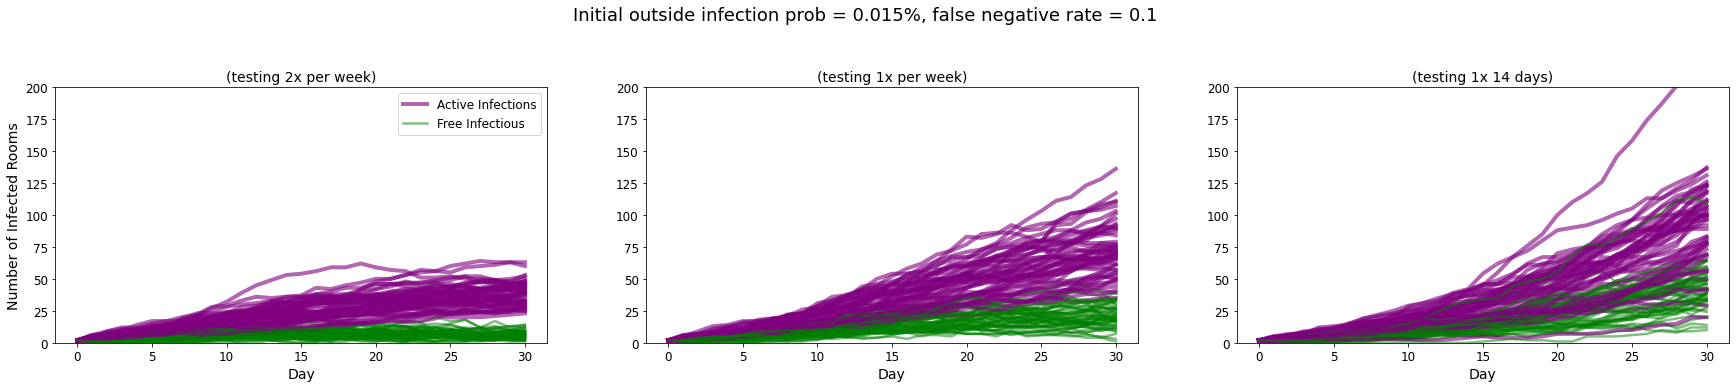

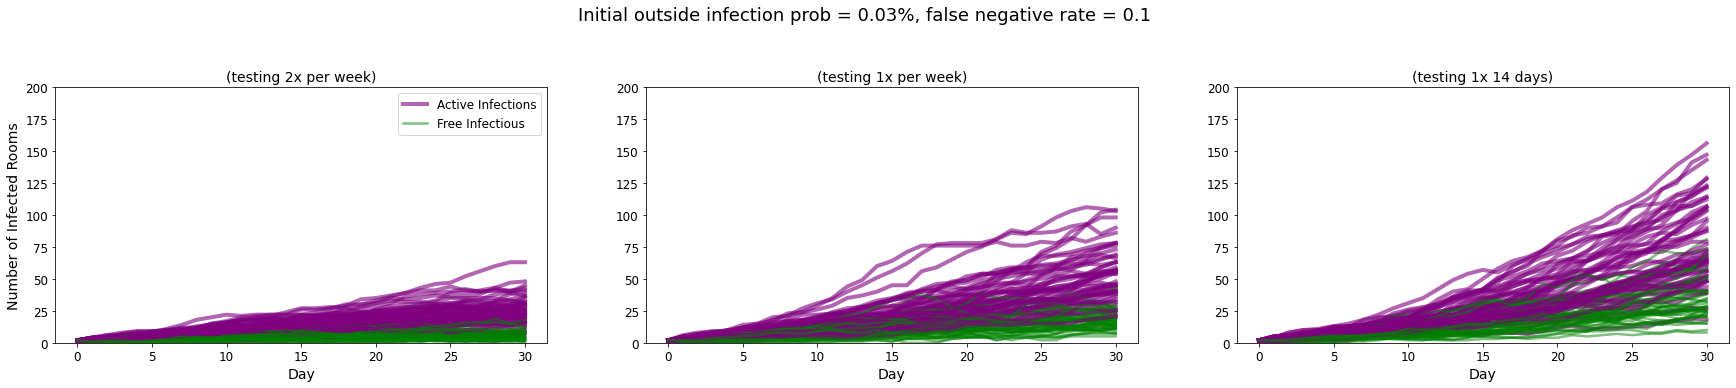

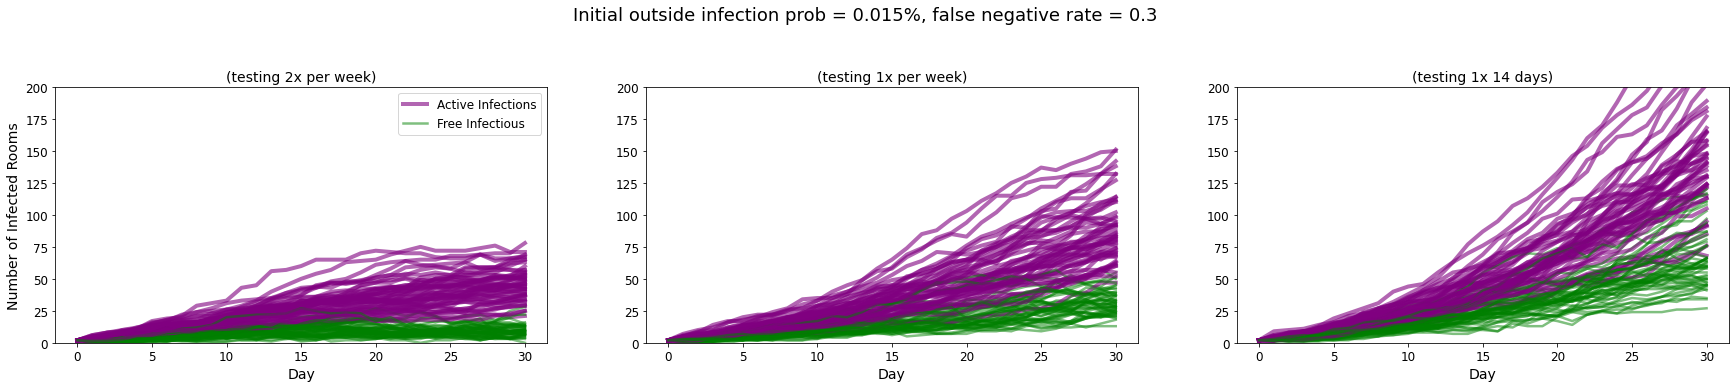

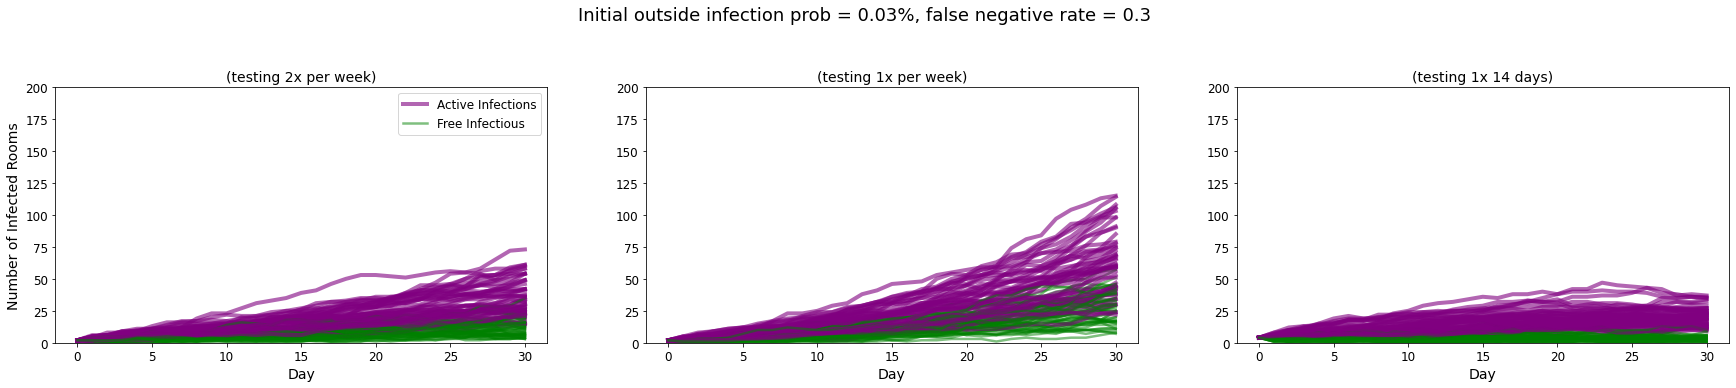

In [223]:
initial_ID_pre_val = [0.000274, 0.0009, 0.00274]
test_popu_frac_val = [0.2857142857, 0.142857142857143, 0.07142857143]
outside_infection_p = [0.00015244, 0.00030488]
test_day = ['2x per week', '1x per week', '1x 14 days']
false_neg_rate = [0.10, 0.30]

dfs=output.sim_results['Nominal Parameters']
for fnr in range(len(false_neg_rate)):
    for oip in range(len(outside_infection_p)):
        fig = plt.figure(figsize=(30,16))
        fig.suptitle('Initial outside infection prob = {}%, false negative rate = {}'.format(round(100 * outside_infection_p[oip], 3), false_neg_rate[fnr]), size=18, y = 0.95)
        fig_count = 0
        # for j in range(len(initial_ID_pre_val)):
        for test_fraction in range(len(test_popu_frac_val)):
            fig_count = fig_count + 1
            plt.subplot(3, 3, fig_count)
            sim_results = dfs[(outside_infection_p[oip], initial_ID_pre_val[0], test_popu_frac_val[test_fraction], false_neg_rate[fnr])]
            plot_fig1(test_fraction, sim_results, test_day[test_fraction])

In [220]:
def plot_isolation(i, data, day):
    #plt.figure(figsize=(15,9))
    #sample = dfsoutput.sim_results['Nominal Parameters'][][0]
    # sample = data
    plt.ylim(0, 200)

    for sample in data:
        # total_isolations = ['cumulative_mild', 'cumulative_severe']
        # plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
        # plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
        plt.plot(sample[total_isolations].sum(axis=1)[0:31], linewidth=2.5, alpha=0.6, color='black')
        plt.plot(sample['QS'][0:31], linewidth=2.5, alpha=0.6, color='red')
        plt.plot(sample['QI'][0:31], linewidth=2.5, alpha=0.6, color='blue')
        # plt.plot(sample[total_mild].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
        # plt.plot(sample['severity_0'], linewidth=2.5, alpha=0.5, color='green')
        # plt.plot(sample['severity_1'], linewidth=2.5, alpha=0.5, color='yellow')
        # plt.plot(sample['severity_2'], linewidth=2.5, alpha=0.5, color='orange')
        # plt.plot(sample['severity_3'], linewidth=2.5, alpha=0.5, color='red')
        # plt.plot(sample[total_severe].sum(axis=1), linewidth=2.5, alpha=0.5, color='blue')
        plt.xlabel("Day", size=14)
    if i==0:
        plt.ylabel("Number of PAIRS of roomates", size=14)
    #plt.title('Simulated COVID Progression under Nominal Parameters\n ({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=18)
    #plt.title('({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=10)
    plt.title('(testing {})'.format(day), size=14)
    if i==0:
        # plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
        plt.legend(('Total isolation need', 'QS', 'QI'), loc='best') 
        #sample_high

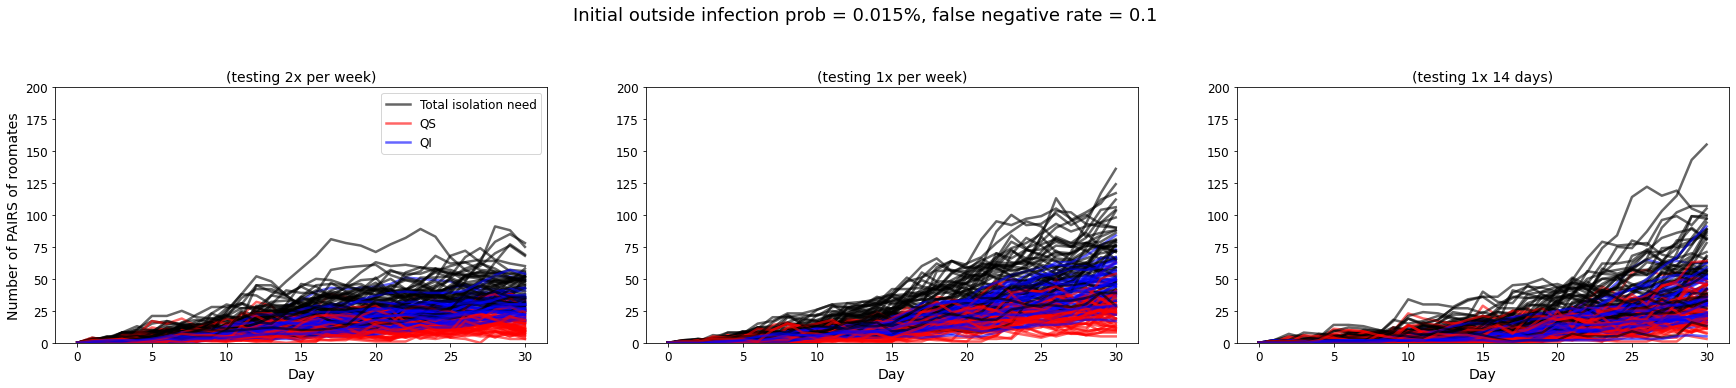

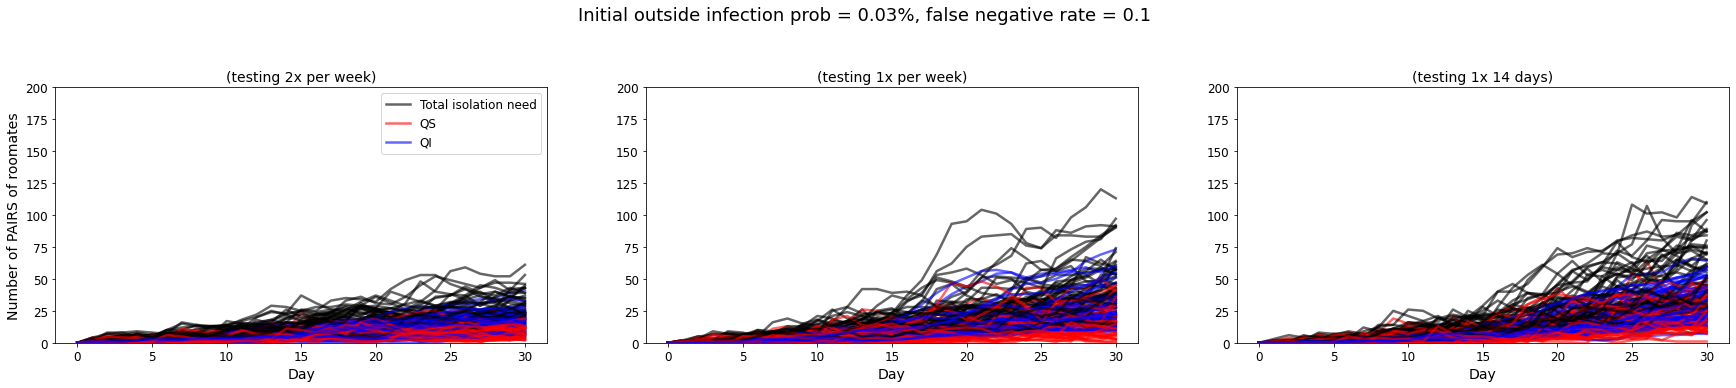

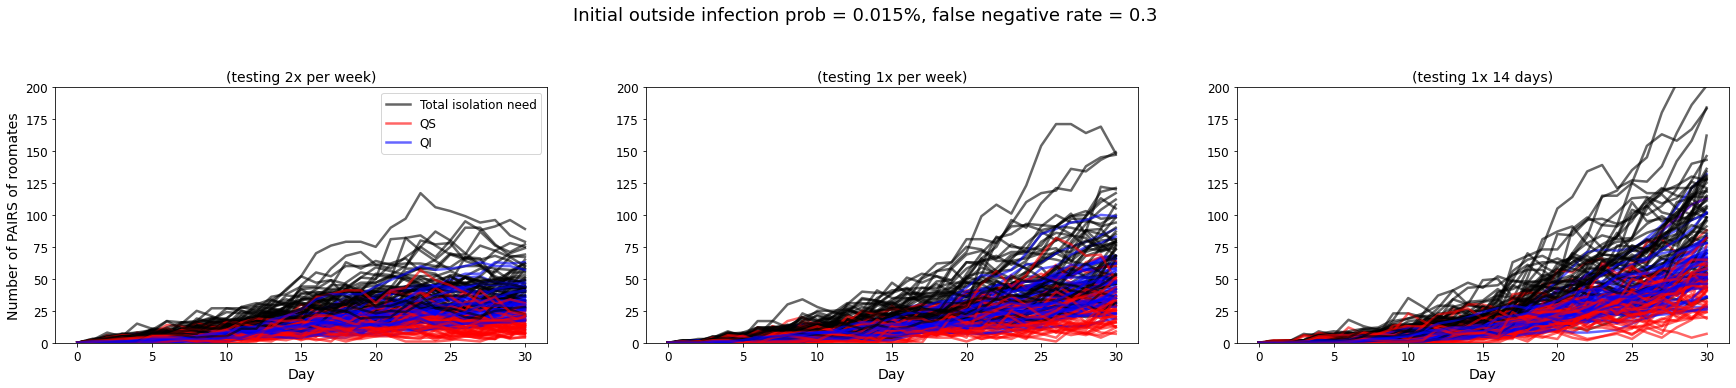

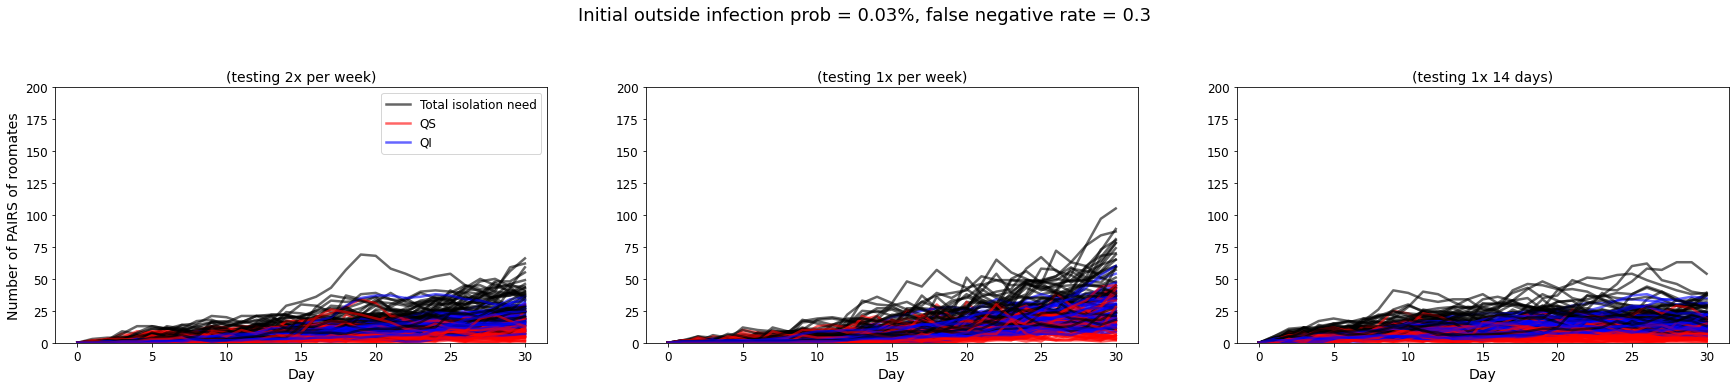

In [221]:
initial_ID_pre_val = [0.000274, 0.0009, 0.00274]
test_popu_frac_val = [0.2857142857, 0.142857142857143, 0.07142857143]
outside_infection_p = [0.00015244, 0.00030488]
test_day = ['2x per week', '1x per week', '1x 14 days']
false_neg_rate = [0.10, 0.30]

dfs=output.sim_results['Nominal Parameters']
for fnr in range(len(false_neg_rate)):
    for oip in range(len(outside_infection_p)):
        fig = plt.figure(figsize=(30,16))
        fig.suptitle('Initial outside infection prob = {}%, false negative rate = {}'.format(round(100 * outside_infection_p[oip], 3), false_neg_rate[fnr]), size=18, y = 0.95)
        fig_count = 0
        # for j in range(len(initial_ID_pre_val)):
        for test_fraction in range(len(test_popu_frac_val)):
            fig_count = fig_count + 1
            plt.subplot(3, 3, fig_count)
            sim_results = dfs[(outside_infection_p[oip], initial_ID_pre_val[0], test_popu_frac_val[test_fraction], false_neg_rate[fnr])]
            plot_isolation(test_fraction, sim_results, test_day[test_fraction])

In [206]:
def plot_severity(i, data, day):
    #plt.figure(figsize=(15,9))
    #sample = dfsoutput.sim_results['Nominal Parameters'][][0]
    # sample = data
    plt.ylim(0, 600)

    for sample in data:
        # total_isolations = ['cumulative_mild', 'cumulative_severe']
        # plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
        # plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
        # plt.plot(sample[total_isolations].sum(axis=1), linewidth=2.5, alpha=0.6, color='black')
        # plt.plot(sample['QS'], linewidth=2.5, alpha=0.6, color='red')
        # plt.plot(sample['QI'], linewidth=2.5, alpha=0.6, color='blue')
        # plt.plot(sample[total_mild].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
        plt.plot(sample['severity_0'], linewidth=2.5, alpha=0.5, color='green')
        plt.plot(sample['severity_1'], linewidth=2.5, alpha=0.5, color='yellow')
        plt.plot(sample['severity_2'], linewidth=2.5, alpha=0.5, color='orange')
        plt.plot(sample['severity_3'], linewidth=2.5, alpha=0.5, color='red')
        # plt.plot(sample[total_severe].sum(axis=1), linewidth=2.5, alpha=0.5, color='blue')
        plt.xlabel("Day", size=14)
    if i==0:
        plt.ylabel("Number of PAIRS of roomates", size=14)
    #plt.title('Simulated COVID Progression under Nominal Parameters\n ({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=18)
    #plt.title('({}%initial prevalence, {}-day testing)'.format(round(100 * int_pre, 3), day), size=10)
    plt.title('(testing {})'.format(day), size=14)
    if i==0:
        # plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
        plt.legend(('Total isolation need', 'QS', 'QI'), loc='best') 
        #sample_high

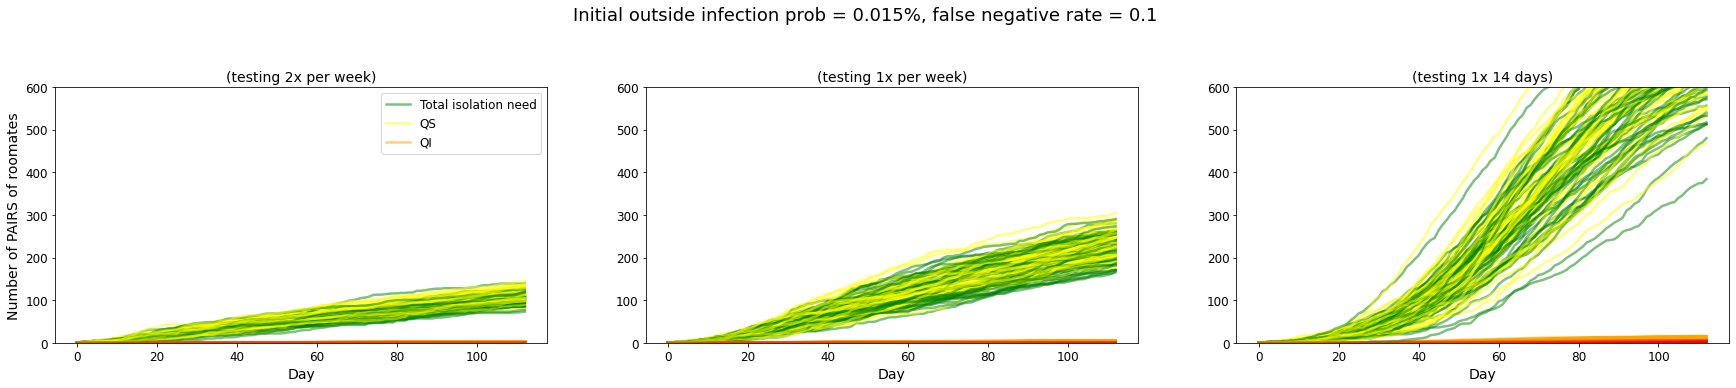

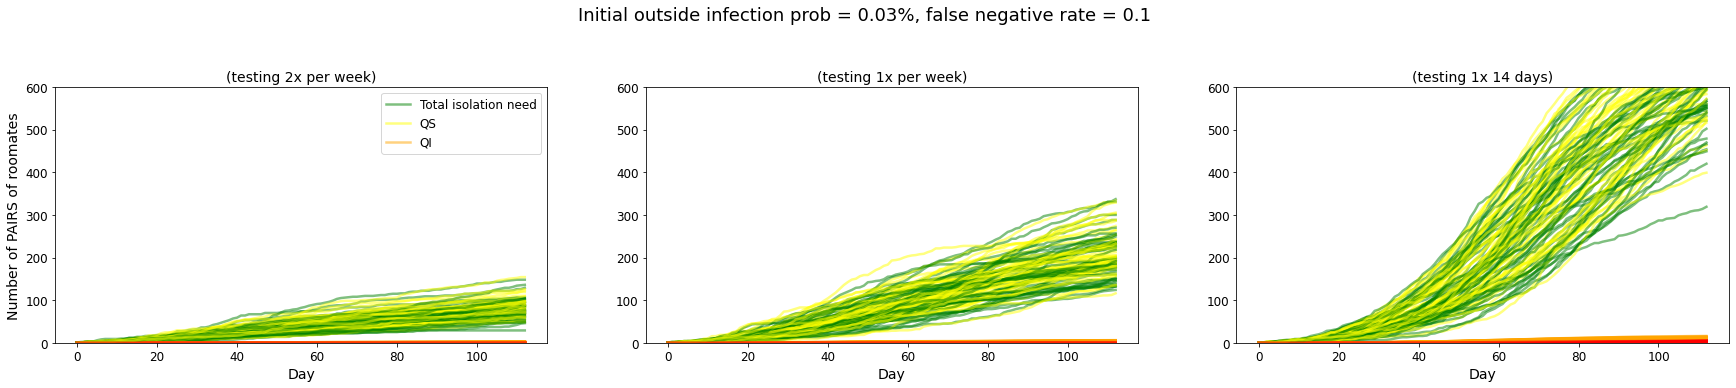

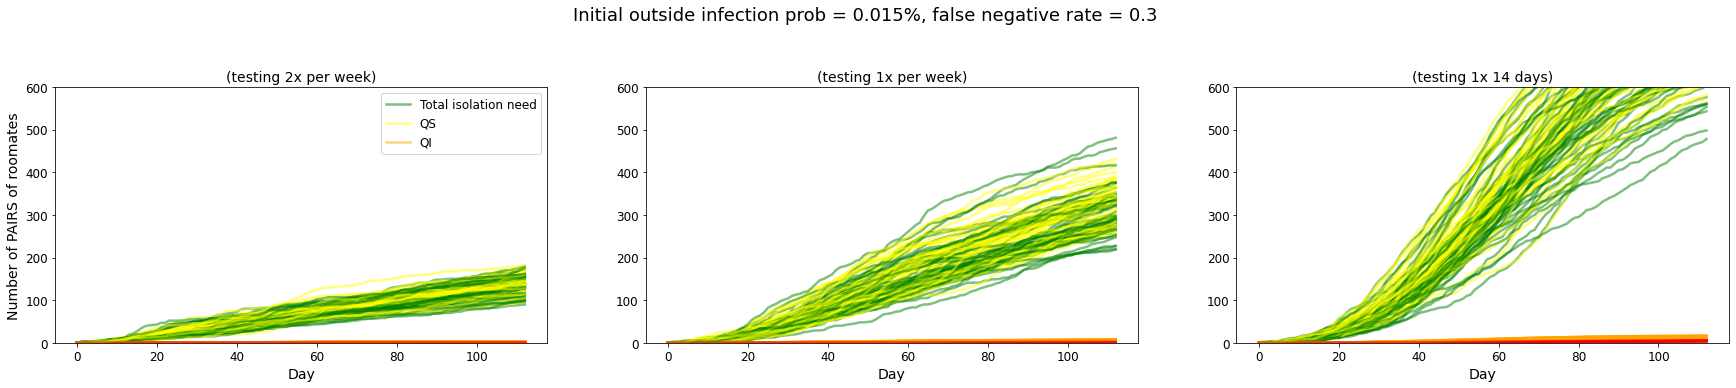

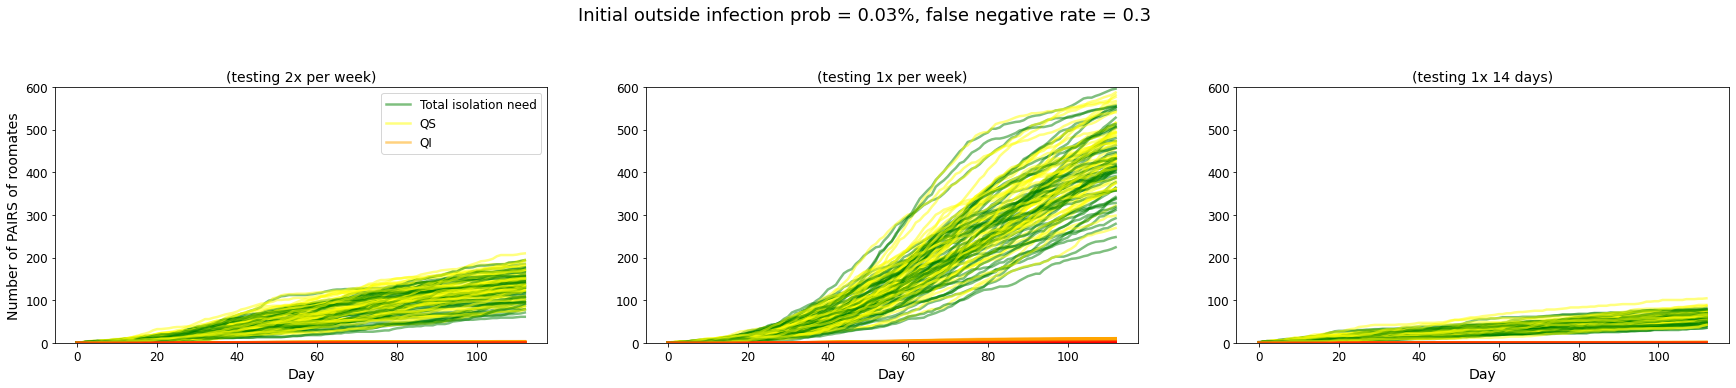

In [207]:
initial_ID_pre_val = [0.000274, 0.0009, 0.00274]
test_popu_frac_val = [0.2857142857, 0.142857142857143, 0.07142857143]
outside_infection_p = [0.00015244, 0.00030488]
test_day = ['2x per week', '1x per week', '1x 14 days']
false_neg_rate = [0.10, 0.30]

dfs=output.sim_results['Nominal Parameters']
for fnr in range(len(false_neg_rate)):
    for oip in range(len(outside_infection_p)):
        fig = plt.figure(figsize=(30,16))
        fig.suptitle('Initial outside infection prob = {}%, false negative rate = {}'.format(round(100 * outside_infection_p[oip], 3), false_neg_rate[fnr]), size=18, y = 0.95)
        fig_count = 0
        # for j in range(len(initial_ID_pre_val)):
        for test_fraction in range(len(test_popu_frac_val)):
            fig_count = fig_count + 1
            plt.subplot(3, 3, fig_count)
            sim_results = dfs[(outside_infection_p[oip], initial_ID_pre_val[0], test_popu_frac_val[test_fraction], false_neg_rate[fnr])]
            plot_severity(test_fraction, sim_results, test_day[test_fraction])

In [110]:
d = dfs[(outside_infection_p[oip], initial_ID_pre_val[0], test_popu_frac_val[test_fraction], false_neg_rate[fnr])]

In [103]:
outside_infection_p[oip]

0.00030488

In [102]:
initial_ID_pre_val[0]

0.000274

In [104]:
test_popu_frac_val[test_fraction]

0.07142857143

In [105]:
false_neg_rate[fnr]

0.3

In [148]:
d[0].columns

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_mild_18', 'SyID_mild_19', 'SyID_severe_0', 'SyID_severe_1',
       'SyID_severe_2', 'SyID_severe_3', 'SyID_severe_4', 'SyID_severe_5',
       'SyID_severe_6', 'SyID_severe_7', 'SyID_severe_8', 'SyID_severe_9',
       'SyID_severe_10', 'SyID_severe_11', 'SyID_severe_12', 'SyID_severe_13',
       'SyID_severe_14', 'SyID_severe_15', 'SyID_severe_16', 'SyID_severe_17',
       'SyID_severe_18', 'SyID_severe_19', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside

In [153]:
d[0][['SyID_mild_1', 'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5', 'SyID_mild_6']]

,SyID_mild_1,SyID_mild_2,SyID_mild_3,SyID_mild_4,SyID_mild_5,SyID_mild_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
108,0,0,0,0,0,1
109,0,0,0,0,1,0
110,0,0,0,0,0,0
111,0,0,0,0,0,0


In [156]:
['SyID_mild_{}'.format(x) for x in range(19)]

['SyID_mild_0',
 'SyID_mild_1',
 'SyID_mild_2',
 'SyID_mild_3',
 'SyID_mild_4',
 'SyID_mild_5',
 'SyID_mild_6',
 'SyID_mild_7',
 'SyID_mild_8',
 'SyID_mild_9',
 'SyID_mild_10',
 'SyID_mild_11',
 'SyID_mild_12',
 'SyID_mild_13',
 'SyID_mild_14',
 'SyID_mild_15',
 'SyID_mild_16',
 'SyID_mild_17',
 'SyID_mild_18']